In [11]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

In [4]:
ls

README.md   RTR.ipynb   RTR2.ipynb


In [3]:
data = pd.read_json('../renttherunway_final_data.json', lines=True)
pd.set_option('display.max_columns', None)

In [4]:
data1 = pd.read_json('../renttherunway_final_data.json', lines=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192544 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192544 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


In [5]:
data1.user_id.nunique()

105571

In [6]:
data1.item_id.nunique()

5850

In [7]:
df = data1.groupby('item_id')
df1 = pd.DataFrame()

for name, group_data in df:
    item_id = name
    avg_rating = np.mean(group_data['rating'])
    item_count = len(group_data)
    
    df1 = df1.append({'item_id': item_id, 'avg_rating': avg_rating, 'item_count': item_count},ignore_index=True)
    

In [8]:
df1.item_count.value_counts()

1.0      341
2.0      323
3.0      313
4.0      274
5.0      250
        ... 
131.0      1
459.0      1
143.0      1
579.0      1
460.0      1
Name: item_count, Length: 288, dtype: int64

In [9]:
rating = []
rented_for = []
perc = []

rented_for_group = data1.groupby(['rating','rented for'])
for name, group_data in rented_for_group:
    rating.append(name[0])
    rented_for.append(name[1])
    perc.append(round(len(group_data)/len(data1[data1['rented for'] == name[1]]),5))
    
rented_for_per = pd.DataFrame({'rating':rating, 'rented_for':rented_for, 'perc': perc})
rented_for_per.sort_values(by = ['rating', 'perc'], ascending = [True, False])

,rating,rented_for,perc
1,2.0,everyday,0.00731
4,2.0,party,0.00646
0,2.0,date,0.00623
7,2.0,work,0.00592
5,2.0,vacation,0.00589
3,2.0,other,0.00578
2,2.0,formal affair,0.00542
6,2.0,wedding,0.00389
9,4.0,everyday,0.02544
15,4.0,work,0.02214


In [10]:
rented_for_data = pd.DataFrame(columns=['rating', 'rented_for', 'perc'])
rented_for_group = data1.groupby(['rating','rented for'])
for name, group_data in rented_for_group:
#     print(name)
#     print(round(len(group_data)/len(data1[data1['rented for'] == name[1]]),5))
    rating = name[0]
    rented_for = name[1]
    perc = round(len(group_data)/len(data1[data1['rented for'] == name[1]]),5)
    rented_for_data = rented_for_data.append({'rating':rating, 'rented_for': rented_for, 'perc':perc},ignore_index=True)
# rented_for_data

In [11]:
data1['rented for'].value_counts()

wedding            57784
formal affair      40408
party              35626
everyday           16822
other              15388
work               15042
date                7388
vacation            4075
party: cocktail        1
Name: rented for, dtype: int64

In [12]:
data = data.dropna(subset = ['rating'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192462 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192462 non-null  object 
 1   user_id         192462 non-null  int64  
 2   bust size       174065 non-null  object 
 3   item_id         192462 non-null  int64  
 4   weight          162505 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192452 non-null  object 
 7   review_text     192462 non-null  object 
 8   body type       177825 non-null  object 
 9   review_summary  192462 non-null  object 
 10  category        192462 non-null  object 
 11  height          191785 non-null  object 
 12  size            192462 non-null  int64  
 13  age             191503 non-null  float64
 14  review_date     192462 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 23.5+ MB


In [13]:
data.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [14]:
# transform weight and height to numeric 
data['weight'] = data['weight'].transform(lambda x: str(x).replace('lbs', '') if str(x) != 'nan' else x).fillna(0).astype(int)

feet = data['height'].str[0].fillna(0).astype(int)
inch = data['height'].str[-3:-1].str.strip().fillna(0).astype(int)
data['height_in'] =  feet * 12 + inch 
data.height_in.unique()

array([68, 66, 64, 65, 69, 63, 62, 67, 61, 70, 72, 58, 73, 71, 60,  0, 59,
       56, 74, 75, 57, 54, 76, 55, 78])

In [15]:
# dummify fit, rented for, body type, category
data = pd.get_dummies(data, columns= ['fit', 'body type', 'rented for', 'category'], dummy_na=True)

In [16]:
# split bust size to bust size and cup size
data['bust_size'] = data['bust size'].transform(lambda x: str(x)[:2] if str(x) != 'nan' else x).fillna(0).astype(int)
data['cup size'] = data['bust size'].transform(lambda x: str(x)[2:] if str(x) != 'nan' else x)

# data['bust_size'] = data['bust size'].str[:2]
# data['cup size'] = data['bust size'].str[2:]

data = pd.get_dummies(data, columns = ['cup size'], dummy_na=True)

In [17]:
data.head()

,user_id,bust size,item_id,weight,rating,review_text,review_summary,height,size,age,review_date,height_in,fit_fit,fit_large,fit_small,fit_nan,body type_apple,body type_athletic,body type_full bust,body type_hourglass,body type_pear,body type_petite,body type_straight & narrow,body type_nan,rented for_date,rented for_everyday,rented for_formal affair,rented for_other,rented for_party,rented for_party: cocktail,rented for_vacation,rented for_wedding,rented for_work,rented for_nan,category_ballgown,category_blazer,category_blouse,category_blouson,category_bomber,category_buttondown,category_caftan,category_cami,category_cape,category_cardigan,category_coat,category_combo,category_crewneck,category_culotte,category_culottes,category_down,category_dress,category_duster,category_for,category_frock,category_gown,category_henley,category_hoodie,category_jacket,category_jeans,category_jogger,category_jumpsuit,category_kaftan,category_kimono,category_knit,category_legging,category_leggings,category_maxi,category_midi,category_mini,category_overalls,category_overcoat,category_pant,category_pants,category_parka,category_peacoat,category_poncho,category_print,category_pullover,category_romper,category_sheath,category_shift,category_shirt,category_shirtdress,category_skirt,category_skirts,category_skort,category_suit,category_sweater,category_sweatershirt,category_sweatpants,category_sweatshirt,category_t-shirt,category_tank,category_tee,category_tight,category_top,category_trench,category_trouser,category_trousers,category_tunic,category_turtleneck,category_vest,category_nan,bust_size,cup size_a,cup size_aa,cup size_b,cup size_c,cup size_d,cup size_d+,cup size_dd,cup size_ddd/e,cup size_f,cup size_g,cup size_h,cup size_i,cup size_j,cup size_nan
0,420272,34d,2260466,137,10.0,An adorable romper! Belt and zipper were a lit...,So many compliments!,"5' 8""",14,28.0,"April 20, 2016",68,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,273551,34b,153475,132,10.0,I rented this dress for a photo shoot. The the...,I felt so glamourous!!!,"5' 6""",12,36.0,"June 18, 2013",66,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,360448,NaN,1063761,0,10.0,This hugged in all the right places! It was a ...,It was a great time to celebrate the (almost) ...,"5' 4""",4,116.0,"December 14, 2015",64,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,909926,34c,126335,135,8.0,I rented this for my company's black tie award...,Dress arrived on time and in perfect condition.,"5' 5""",8,34.0,"February 12, 2014",65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,151944,34b,616682,145,10.0,I have always been petite in my upper body and...,Was in love with this dress !!!,"5' 9""",12,27.0,"September 26, 2016",69,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [20]:
data['age'] = data['age'].fillna(0)

In [21]:
data['review_date'] = pd.to_datetime(data['review_date'])

In [22]:
# Review date range 2010-11-03 ~ 2018-01-08
data['review_date'].sort_values()

179582   2010-11-03
95281    2011-02-14
42851    2011-02-23
47750    2011-02-24
171955   2011-03-06
            ...    
156095   2018-01-06
19016    2018-01-07
38691    2018-01-07
69945    2018-01-07
40148    2018-01-08
Name: review_date, Length: 192462, dtype: datetime64[ns]

In [23]:
# divide rating by 2 so the rating is 1 to 5 instead of 2, 4, 6, 8, 10
data['rating'] = data['rating'] /2

In [24]:
data['rating'].value_counts()

5.0    124537
4.0     53391
3.0     10697
2.0      2791
1.0      1046
Name: rating, dtype: int64

Text(0.5, 1.0, 'Rating Distribution')

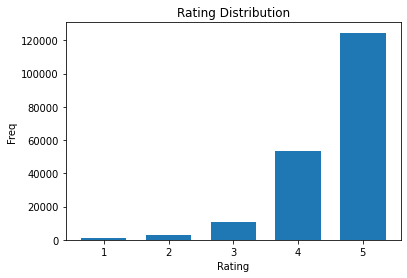

In [25]:
fig, ax = plt.subplots()
x = data['rating'].value_counts().index
y = data['rating'].value_counts()

ax.bar(x,y, width = 0.7)
ax.set_xlabel('Rating')
ax.set_ylabel('Freq')
ax.set_title('Rating Distribution')

Text(0.5, 1.0, 'Review Date Distribution')

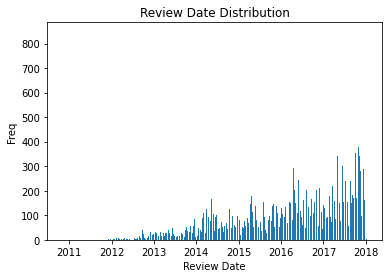

In [26]:
fig, ax = plt.subplots()
x = data['review_date'].value_counts().index
y = data['review_date'].value_counts()

ax.bar(x,y, width = 0.7)
ax.set_xlabel('Review Date')
ax.set_ylabel('Freq')
ax.set_title('Review Date Distribution')

In [27]:
data['year'] = data['review_date'].dt.to_period('Y').astype(str).astype(int)

In [28]:
data['year'].value_counts().sort_index()

2010        1
2011      190
2012     3302
2013     9617
2014    28269
2015    30596
2016    51361
2017    67871
2018     1255
Name: year, dtype: int64

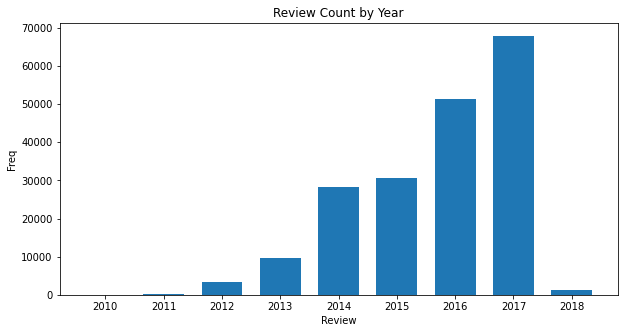

In [29]:
fig, ax = plt.subplots(figsize = (10,5))
x = data['year'].value_counts().index
y = data['year'].value_counts()

ax.bar(x,y, width = 0.7)
ax.set_xlabel('Review')
ax.set_ylabel('Freq')
ax.set_title('Review Count by Year')
ax.set_xticks(x);

In [30]:
X = data.drop(columns='rating')
y = data['rating']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [32]:
X_train.columns.to_numpy()

array(['user_id', 'bust size', 'item_id', 'weight', 'review_text',
       'review_summary', 'height', 'size', 'age', 'review_date',
       'height_in', 'fit_fit', 'fit_large', 'fit_small', 'fit_nan',
       'body type_apple', 'body type_athletic', 'body type_full bust',
       'body type_hourglass', 'body type_pear', 'body type_petite',
       'body type_straight & narrow', 'body type_nan', 'rented for_date',
       'rented for_everyday', 'rented for_formal affair',
       'rented for_other', 'rented for_party',
       'rented for_party: cocktail', 'rented for_vacation',
       'rented for_wedding', 'rented for_work', 'rented for_nan',
       'category_ballgown', 'category_blazer', 'category_blouse',
       'category_blouson', 'category_bomber', 'category_buttondown',
       'category_caftan', 'category_cami', 'category_cape',
       'category_cardigan', 'category_coat', 'category_combo',
       'category_crewneck', 'category_culotte', 'category_culottes',
       'category_down', 'cate

In [33]:
# Baseline model = always predict the mean rating
mean_rating = np.mean(y_train)
y_pred = np.full(y_test.shape, mean_rating)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.7146114160372574

In [34]:
# Linear Regression
# Feature selection: fit: fit, large, weight, age, height_in
X_train_lr = X_train[['fit_fit', 'fit_large', 'weight', 'age', 'height_in']]
X_test_lr = X_test[['fit_fit', 'fit_large', 'weight', 'age', 'height_in']]

In [35]:
X_train_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144346 entries, 153576 to 128091
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   fit_fit    144346 non-null  uint8  
 1   fit_large  144346 non-null  uint8  
 2   weight     144346 non-null  int64  
 3   age        144346 non-null  float64
 4   height_in  144346 non-null  int64  
dtypes: float64(1), int64(2), uint8(2)
memory usage: 4.7 MB


In [36]:
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train)
y_pred = lr_model.predict(X_test_lr)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.6911632596141852

The rmse of the linear regression model is better than the baseline.

In [37]:
# Linear Regression - 2nd iteration
# Feature selection: fit, weight, age, height_in, rented for
X_train_lr2 = X_train[['fit_fit', 'fit_large', 'weight', 'age', 'height_in','rented for_date',
       'rented for_everyday', 'rented for_party', 'rented for_vacation', 'rented for_work']]
X_test_lr2 = X_test[['fit_fit', 'fit_large', 'weight', 'age', 'height_in','rented for_date',
       'rented for_everyday', 'rented for_party', 'rented for_vacation', 'rented for_work']]
X_train_lr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144346 entries, 153576 to 128091
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fit_fit              144346 non-null  uint8  
 1   fit_large            144346 non-null  uint8  
 2   weight               144346 non-null  int64  
 3   age                  144346 non-null  float64
 4   height_in            144346 non-null  int64  
 5   rented for_date      144346 non-null  uint8  
 6   rented for_everyday  144346 non-null  uint8  
 7   rented for_party     144346 non-null  uint8  
 8   rented for_vacation  144346 non-null  uint8  
 9   rented for_work      144346 non-null  uint8  
dtypes: float64(1), int64(2), uint8(7)
memory usage: 5.4 MB


In [38]:
lr2_model = LinearRegression()
lr2_model.fit(X_train_lr2, y_train)
y_pred = lr2_model.predict(X_test_lr2)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.6889256026655455

The rmse of the 2nd linear regression model is better than the baseline and the first linear regression model.

In [282]:
# Desicion Tree
dt_grid = {'max_depth': [5, 7, None],
            'max_features': ['sqrt', 'log2', None],
            'min_samples_split': [2, 4, 6],
            'min_samples_leaf': [15, 20, 25, 30],
            'random_state': [1, None]}

dt_gridsearch = GridSearchCV(DecisionTreeRegressor(),
                                 dt_grid,
                                 n_jobs=-1,
                                 verbose=True,
                                 scoring='neg_mean_squared_error')

In [41]:
dt_columns = [ 'weight',  'size', 'age', 
       'fit_fit', 'fit_large', 'body type_apple',
       'body type_athletic', 'body type_full bust', 'body type_hourglass',
       'body type_pear', 'body type_petite',
       'body type_straight & narrow',  'rented for_date',
       'rented for_everyday', 'rented for_formal affair',
       'rented for_other', 'rented for_party',
       'rented for_party: cocktail', 'rented for_vacation',
       'rented for_wedding', 'rented for_work', 
       'category_ballgown', 'category_blazer', 'category_blouse',
       'category_blouson', 'category_bomber', 'category_buttondown',
       'category_caftan', 'category_cami', 'category_cape',
       'category_cardigan', 'category_coat', 'category_combo',
       'category_crewneck', 'category_culotte', 'category_culottes',
       'category_down', 'category_dress', 'category_duster',
       'category_for', 'category_frock', 'category_gown',
       'category_henley', 'category_hoodie', 'category_jacket',
       'category_jeans', 'category_jogger', 'category_jumpsuit',
       'category_kaftan', 'category_kimono', 'category_knit',
       'category_legging', 'category_leggings', 'category_maxi',
       'category_midi', 'category_mini', 'category_overalls',
       'category_overcoat', 'category_pant', 'category_pants',
       'category_parka', 'category_peacoat', 'category_poncho',
       'category_print', 'category_pullover', 'category_romper',
       'category_sheath', 'category_shift', 'category_shirt',
       'category_shirtdress', 'category_skirt', 'category_skirts',
       'category_skort', 'category_suit', 'category_sweater',
       'category_sweatershirt', 'category_sweatpants',
       'category_sweatshirt', 'category_t-shirt', 'category_tank',
       'category_tee', 'category_tight', 'category_top',
       'category_trench', 'category_trouser', 'category_trousers',
       'category_tunic', 'category_turtleneck', 
        'bust_size', 'cup size_a', 'cup size_aa',
       'cup size_b', 'cup size_c', 'cup size_d', 'cup size_d+',
       'cup size_dd', 'cup size_ddd/e', 'cup size_f', 'cup size_g',
       'cup size_h', 'cup size_i', 'cup size_j', 
       'height_in']

In [283]:
dt_gridsearch.fit(X_train[dt_columns], y_train)
print("Best parameters:", dt_gridsearch.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.3min finished


Best parameters: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 2, 'random_state': 1}


In [284]:
dt_model = dt_gridsearch.best_estimator_
y_pred = dt_model.predict(X_test[dt_columns])
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.6854228679238243

In [289]:
# Random Forest
rf_grid = {'max_depth': [5, None],
            'min_samples_split': [4, 6],
            'min_samples_leaf': [10,20],
            'bootstrap': [True, False],
            'random_state': [1]}
           
rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                                 rf_grid,
                                 n_jobs=-1,
                                 verbose=True,
                                 scoring='neg_mean_squared_error')

In [290]:
rf_gridsearch.fit(X_train[dt_columns], y_train)
print("Best parameters:", rf_gridsearch.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 26.6min finished


Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 20, 'min_samples_split': 4, 'random_state': 1}


In [291]:
rf_model = rf_gridsearch.best_estimator_
y_pred = rf_model.predict(X_test[dt_columns])
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.682363712800322

In [42]:
rf_model = RandomForestRegressor(bootstrap = True, max_depth = None, 
                                 min_samples_leaf = 20, min_samples_split = 4,
                                 random_state = 1)
rf_model.fit(X_train[dt_columns], y_train)
y_pred = rf_model.predict(X_test[dt_columns])
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.682363712800322

### Recommender 

In [55]:
def get_numeric_range(data, range_num, col_name, col_val = None):
    sorted_col = data[col_name].sort_values().reset_index(drop=True)
    
    if col_val == None:
        col_val = np.mean(sorted_col)

    if bottom < np.min(data[col_name]):
        bottom = np.min(data[col_name])
        up = np.min(data[col_name]) + 2*range_num
        
    elif up > np.max(data[col_name]):
        up = np.max(data[col_name])
        bottom = np.max(data[col_name]) - 2*range_num
        
    print(f'{col_name} range: {bottom} - {up}')
    return bottom, up

In [76]:
def get_similar_users(data, height=None, weight=None, age=None, size=None, 
                     body_type=None, bust_size=None):
    
    user_data = data[['user_id','height', 'weight', 'age', 'size']]
    user_data.drop_duplicates(keep='first', inplace=True)
    
    user_data['weight'] = (user_data['weight']
                           .transform(lambda x: str(x)
                           .replace('lbs', '') if str(x) != 'nan' else x)
                           .fillna(0).astype(int))
    
    feet = user_data['height'].str[0].fillna(0).astype(int)
    inch = user_data['height'].str[-3:-1].str.strip().fillna(0).astype(int)
    user_data['height'] =  feet * 12 + inch 
    
    user_data['age'] = user_data['age'].fillna(0)
    
#     user_data['bust size'] = (user_data['bust size']
#                          .transform(lambda x: str(x)[:2] if str(x) != 'nan' else x)
#                          .fillna(0).astype(int))
#     user_data['cup size'] = (user_data['bust size']
#                         .transform(lambda x: str(x)[2:] if str(x) != 'nan' else x)
                        
#     user_features = pd.get_dummies(user_data, columns= ['body type'], dummy_na=True)

    new_user = np.array([[height, weight, age, size]])
    user_id = user_data['user_id']
    user_info = user_data[['height', 'weight', 'age', 'size']]
    
    similarity_matrix = cosine_similarity(new_user, user_info)
    
    similarity_df = pd.DataFrame(data = similarity_matrix.reshape(-1), index = user_id,columns=['similarity'])
                             
    return similarity_df.sort_values(by = 'similarity', ascending = False)[:100]

In [110]:
def get_top_rated_items(data, average_weight = 0.05, height=None, weight=None, age=None, size=None, 
                     body_type=None, bust_size=None):
    
    similarity_df = get_similar_users(data, height, weight, age, size)
    similar_users = data[data['user_id'].isin(similarity_df.index)][['item_id', 'rating']]
    similar_users['rating'] = similar_users['rating']/2
    
    grouped_items = similar_users.groupby('item_id')
    weighted_average_df = pd.DataFrame()
    
    for item, item_data in grouped_items:
        avg_rating = np.mean(item_data.rating)
        weighted_rating = avg_rating + (len(item_data))*average_weight
        weighted_average_df = weighted_average_df.append({'item_id': item,
                                                        'avg_rating': avg_rating,
                                                        'count': len(item_data),
                                                        'weighted_rating':weighted_rating},
                                                        ignore_index=True)
        
    return weighted_average_df.sort_values(by = 'weighted_rating', ascending = False)[:10]

In [32]:
data1 = pd.read_json('../renttherunway_final_data.json', lines=True)
data_wedding = data1[data1['rented for'] == 'wedding']

In [93]:
similarity_df = get_similar_users(data_wedding, 62, 112, 25, 4)
similarity_df.index

Int64Index([232364,  83764, 671652, 162324, 335672, 918217, 583627,  77305,
             28890, 680236, 522616, 172140, 401878, 922274, 705506, 910367,
            248368, 340797, 228494,  53849, 464465,  30460, 632504, 221624,
            262317, 522616, 172140, 641861, 232299, 139138, 419712, 213298,
            132002, 737193, 176204, 589984, 624724,   2965, 471060, 885111,
            945088, 550342,  48364,  28758,   1499, 923052, 183805, 167612,
            133344, 287861, 841251, 105282, 516453, 658213, 724523, 838294,
             21408,  82238, 249049, 740566, 740566, 565823, 390415, 740642,
            238528, 137742, 155886, 793082, 765371, 628832, 334537, 634801,
            524429, 671113, 629926, 652635, 386945, 355930, 953547, 562101,
            731567, 849184, 142903, 890237, 737585, 813202, 795383, 189527,
            674010, 245420, 756102, 526083, 188749,  24869, 395039, 693624,
            497350, 340907, 202388, 151529],
           dtype='int64', name='user_id')

In [111]:
get_top_rated_items(data_wedding, 0.1, 62, 112, 25, 4)

,avg_rating,count,item_id,weighted_rating
16,5.0,2.0,164593.0,5.2
75,5.0,2.0,1057664.0,5.2
35,5.0,2.0,424691.0,5.2
67,5.0,2.0,926842.0,5.2
60,5.0,2.0,862446.0,5.2
24,5.0,2.0,268562.0,5.2
87,5.0,1.0,1335648.0,5.1
88,5.0,1.0,1353012.0,5.1
89,5.0,1.0,1356952.0,5.1
90,5.0,1.0,1404676.0,5.1


In [112]:
data_wedding[data_wedding['item_id'] == 164593]

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
209,fit,494310,34c,164593,140lbs,10.0,wedding,The dress was beautiful and flattering. My bo...,hourglass,The mother of the bride told me I looked like ...,dress,"5' 5""",16,30.0,"January 8, 2013"
968,small,415447,34b,164593,130lbs,10.0,wedding,This dress was so much fun to wear!! I'm usual...,straight & narrow,Sparkly & Fun!,dress,"5' 5""",12,32.0,"October 3, 2014"
1737,fit,815864,34d,164593,130lbs,10.0,wedding,I wore this to a wedding in South Carolina. I ...,hourglass,What an amazing dress!,dress,"5' 6""",12,28.0,"May 13, 2013"
5188,small,335391,36c,164593,150lbs,8.0,wedding,The dress is flattering in all the right areas...,hourglass,"Fun!! The glitz keeps it fun, but the cut kee...",dress,"5' 7""",20,30.0,"November 20, 2013"
7735,fit,414253,34d,164593,130lbs,10.0,wedding,I usually wear a 4 but I'm pretty curvy (and w...,full bust,I wore this to a black tie wedding and felt ex...,dress,"5' 3""",12,36.0,"June 12, 2013"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185692,fit,516183,34b,164593,110lbs,10.0,wedding,"I love this dress, it fit perfectly! Very ele...",hourglass,Elegant,dress,"5' 2""",8,30.0,"September 17, 2013"
186806,fit,217747,34c,164593,145lbs,4.0,wedding,"Pretty dress but did nothing for my curvy, sli...",apple,Not for me,dress,"5' 3""",16,41.0,"February 22, 2014"
188796,fit,17003,34b,164593,105lbs,10.0,wedding,Wore for a black tie wedding in November. Got ...,petite,great sparkle,dress,"5' 3""",4,28.0,"April 8, 2014"
192150,fit,610601,NaN,164593,NaN,8.0,wedding,Its a little itchy and it can be hard to hid a...,petite,Beautiful dress and very faltering!,dress,"5' 4""",8,28.0,"April 23, 2014"
